**Introduction :**
<p>The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit ?.</p>

**Understanding the dataset :**
<p>
1.Client-Related Features<br>
- age: Older or younger clients might respond differently.<br>
- job: Certain professions may be more likely to invest.<br>
- marital: Marital status might influence financial decisions.<br>
- education: Higher education levels could correlate with a better understanding of investments.<br>
    
2.Financial Information<br>
- default: Whether the client has credit in default may affect their likelihood of subscribing.<br>
- housing: Owning a house might indicate financial stability.<br>
- loan: Clients with personal loans may be less likely to invest in term deposits.<br>

3.Campaign-Related Features<br>
- contact: The type of contact (e.g., telephone) can affect engagement.<br>
- month: Seasonality might impact client behavior.<br>
- day_of_week: Some days may have higher conversion rates.<br>
- campaign: The number of contacts performed during the campaign could affect the decision.<br>

4.Past Campaign Results<br>
- pdays: Number of days since last contact (-1 or 999 means no previous contact).<br>
- previous: Number of times contacted before.<br>
- poutcome: Outcome of the previous campaign (success, failure, nonexistent).<br>

5.Macro-Economic Indicators<br>
- emp.var.rate: Employment variation rate, which affects financial decisions.<br>
- cons.price.idx: Consumer price index, affecting economic conditions.<br>
- cons.conf.idx: Consumer confidence index, indicating economic sentiment.<br>
- euribor3m: 3-month Euro Interbank Offered Rate, influencing financial markets.<br>
- nr.employed: Number of employees in the economy, affecting job stability.<br>
</p>

In [1]:
# for data manuplation we use pandas library
# for data visualization matplotlib and seaborn library is used
# sklearn is a machine learning library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [2]:
# read_csv() is a pandas function to read the data 
# delimiter is separator that is used to separate columns
data=pd.read_csv('bank-additional-full.csv',delimiter=';')

In [3]:
# data is converted into DataFrame 
# DataFrame is nothing but the table with rows and columns
df=pd.DataFrame(data)

In [4]:
# head() is a pandas function to get the top 5 records from the table
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# columns is a method to return the column names 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# describe is a method in pandas returns overview of the data
print(df.describe)

<bound method NDFrame.describe of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

In [7]:
# column 'y' contains string value which is yes/no so convert it in numeric 1/0
df['y']=df['y'].map({'yes':1,'no':0})

In [10]:
# all columns except 'y' which is target is assigned to X
# X and y are nothing but the variables
X = df.drop(columns=['y'])

In [11]:
# target column is assigned to y
y=df['y']

**Using Class Distribution Technique :**
<p>
    Before training the model to check data is balanced or imbalanced this technique is used
</p>

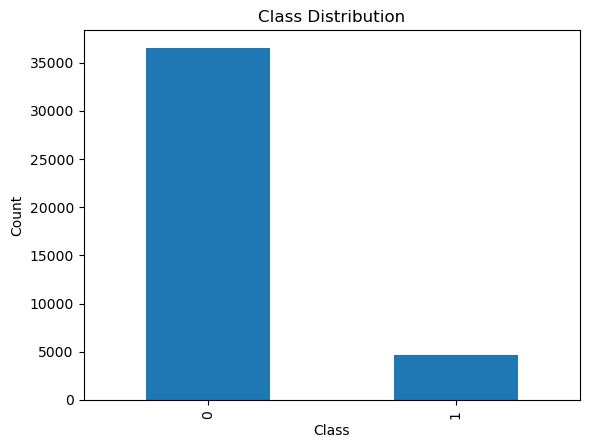

In [14]:
# to check the data is balanced or imbalanced 
import matplotlib.pyplot as plt

df['y'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


> most of the data belongs to class 0 that means the dataset is imbalanced

In [15]:
# to get the top 5 records of X
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [16]:
# to get top 5 records of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Label Encoding is used to convert categorical columns into numerical columns <br>
It assigns a unique integer to each category.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
# for loop is used to iterate in the list and perform label enconding to each column in the list
for col in ['job','marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']:
    df[col]=le.fit_transform(df[col])

print(df)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous 

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


**Bivariate Analysis**
<p>
    to check relationship between two variables
</p>

<p>
    If one variable is categorical and one is numerical then we use T-test & boxplots <br>
    T-test - checks means are different
    
</p>

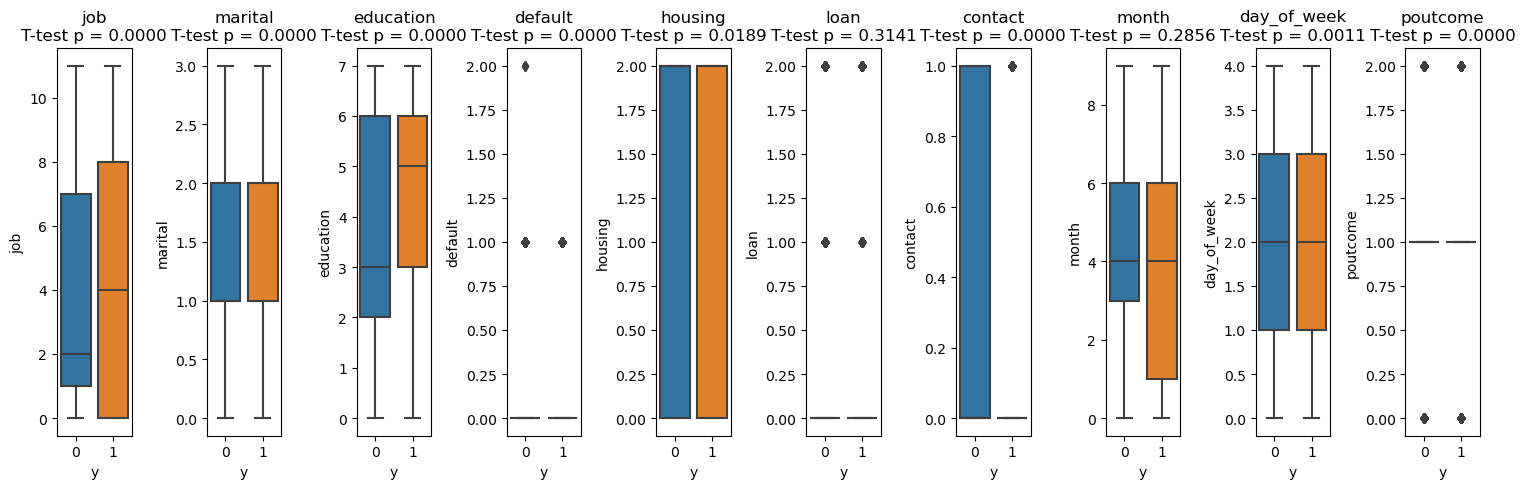

T-test Results (p-values):
job: p-value = 0.000000
marital: p-value = 0.000000
education: p-value = 0.000000
default: p-value = 0.000000
housing: p-value = 0.018853
loan: p-value = 0.314135
contact: p-value = 0.000000
month: p-value = 0.285588
day_of_week: p-value = 0.001134
poutcome: p-value = 0.000000


In [28]:
from scipy.stats import ttest_ind

# selecting multiple numerical features 
features = ['job','marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome'] 

# dictionary to store T-test results
t_test_results = {}

# create subplots for multiple boxplots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

# iterate through each feature to perform T-test and plot
for i, feature in enumerate(features):
    # Separating the two groups based on target variable 'y'
    group1 = df[df['y'] == 0][feature]
    group2 = df[df['y'] == 1][feature]
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's T-test
    
    # storing results
    t_test_results[feature] = p_value
    
    # box plot for the current feature
    sns.boxplot(x=df['y'], y=df[feature], ax=axes[i])
    axes[i].set_title(f'{feature}\nT-test p = {p_value:.4f}')

plt.tight_layout()
plt.show()

print("T-test Results (p-values):")
for feature, p_val in t_test_results.items():
    print(f"{feature}: p-value = {p_val:.6f}")

> if p-value < 0.05 then the feature has influence on y<br>
> if p-value > 0.05 then the feature has no influence on y

**Multivariate Analysis**

<p>
    It checks relationships between three or more variables simultaneously.
</p>

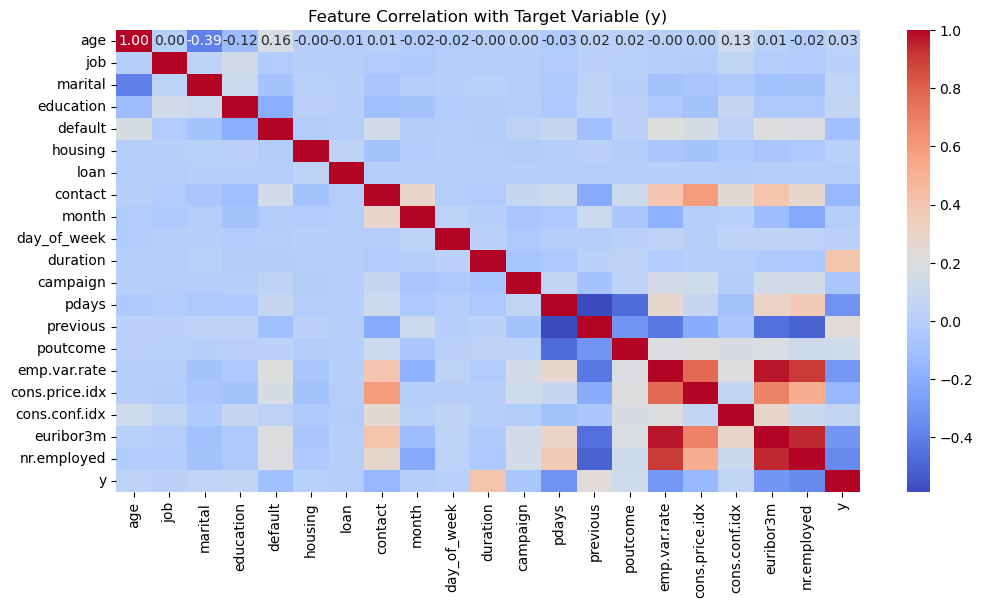

In [36]:
# Compute correlation
corr = df.corr()

# Plot heatmap
# to set the figure size
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Target Variable (y)")
plt.show()

> Features like poutcome, emp.var.rate, euribor3m, and nr.employed seem to have stronger relationships with y 

In [37]:
X = df.drop(columns=['y'])
y = df['y']

**Feature Selection techniques**
<p>
    To determine which fatures are important to train the model
</p>

**Random Forest Feature Importance**

<p>
    It measures how much each feature contributes to reducing impurity.<br>
Features with higher importance scores have a stronger impact on the model’s decision-making.
</p>

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [40]:
# data is fit to RandomForestClassifier
rf.fit(X,y)

RandomForestClassifier(random_state=42)

In [41]:
# fetaure importance is calculated and stored 
importance = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=True)
print(importance)

default           0.008894
contact           0.009263
previous          0.013527
loan              0.014996
month             0.017266
emp.var.rate      0.019809
housing           0.020226
cons.price.idx    0.022418
marital           0.023406
cons.conf.idx     0.028227
poutcome          0.029780
pdays             0.034339
day_of_week       0.040689
campaign          0.042856
education         0.043033
job               0.048379
nr.employed       0.065854
age               0.092458
euribor3m         0.102378
duration          0.322205
dtype: float64


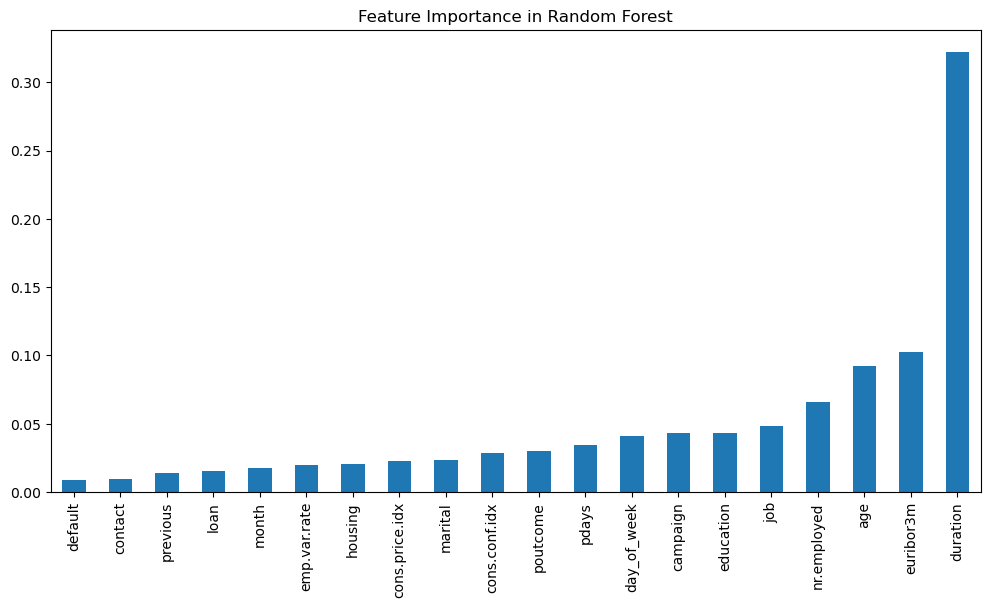

In [42]:
# Plot feature importance
importance.plot(kind="bar", figsize=(12, 6), title="Feature Importance in Random Forest")
plt.show()

**Using Recursive feature Elimination**

*It eliminates least important features one by one*

In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr)
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features: Index(['marital', 'default', 'contact', 'month', 'day_of_week', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')


>*By observing the output of Random Forest Feature Selection and Recursive Feature Selection the common features in both are taken and 'duration','euribor3m','age','nr.employed' are highly important in Random Forest Feature Selection but it's least important in RFE so these features are also considered*

In [43]:
X = df[['duration','euribor3m','age','nr.employed','marital', 'default', 'contact', 'month', 'day_of_week', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']]

In [44]:
y = df['y']

**Logistic Regression**
<p>
    Logistic Regression is a supervised machine learning algorithm used for classification problems.<br>
    It is commonly used when the target variable is binary
</p>

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_reg = LogisticRegression()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# to split the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [49]:
# hyperparameter tunning
param_grid = {
    'penalty':['l1','l2','elasticnet'],
    'max_iter':[100,200,300],
    'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]
}

_I have used GridSearchCV to find best prameters to train the model_ <br>
it performs step by step checking each parameter

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid_cv = GridSearchCV(log_reg,param_grid,scoring='accuracy',cv=5)

In [52]:
grid_cv.fit(X_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                               60],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [54]:
# i have used penalty l2 because it is the best parameter after performing GridSearchCV
# l1 is lasso regression and l2 is ridge regression both are used to prevent from overfitting by adding weights
grid_cv.best_params_

{'C': 8, 'max_iter': 300, 'penalty': 'l2'}

In [165]:
best_params=grid_cv.best_params_

In [166]:
grid_cv.best_score_

0.9092292626824083

In [169]:
# training the model with best parameters which are given by GridSearchCV
log_reg_best = LogisticRegression(**best_params)

In [170]:
# fitting the training data to the model
log_reg.fit(X_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
# used to make predictions on test data
y_pred=log_reg.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      9685
           1       0.35      0.65      0.45       612

    accuracy                           0.91     10297
   macro avg       0.66      0.79      0.70     10297
weighted avg       0.94      0.91      0.92     10297



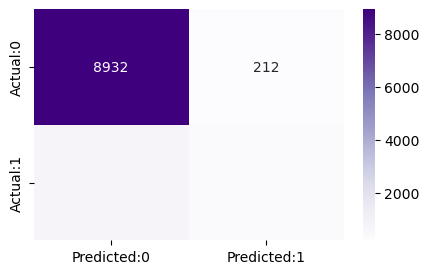

In [172]:
# plotting confusion matrix
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cmap='Purples')
plt.show()

Precision - Precision tells us how many of the predicted positive instances were actually correct.<br>
            *High Precision - Fewer false positives* <br>
Recall - Recall tells us how many of the actual positive instances were correctly identified.<br>
           *High Recall - Fewer false negatives* <br>
f1-score - F1-score balances Precision and Recall, making it useful when both false positives and false negatives matter.
           *High F1-score - A good balance between Precision and Recall.*

In [173]:
# calculating training , testing accuracy, recall,precision, f1-score
train_acc=log_reg.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 90.18808067074553
Testing Accuracy : 90.62833835097601
F1 Score : 45.3257790368272
Recall : 34.69210754553339
Precision : 65.359477124183


**Support Vector Machine**

<p>
    Support Vector Machine is a supervised learning algorithm used for classification and regression tasks.<br>
    It tries to find best hyper plane which will separate the data.
</p>

In [174]:
from sklearn.svm import SVC

support_vector = SVC()

In [175]:
param_grid = {
    'C':[1,2,3,4,5,6,7,8,9,10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale','auto'],
    'max_iter':[100,200,300]
}

In [176]:
gridSearch = GridSearchCV(support_vector,param_grid,scoring='accuracy',cv=7)

In [177]:
gridSearch.fit(X_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Con

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [178]:
best_params=gridSearch.best_params_

In [179]:
gridSearch.best_score_

0.8855330031400731

In [180]:
# fitting the best parameters to the svm 
svm_best = SVC(**best_params)

In [181]:
svm_best.fit(X_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, gamma='auto', max_iter=100)

In [182]:
# accuracy score of testing data
svm_best.score(X_test,y_test)

0.8864717878993882

In [183]:
# used to make predictions on test data
y_pred= svm_best.predict(X_test)

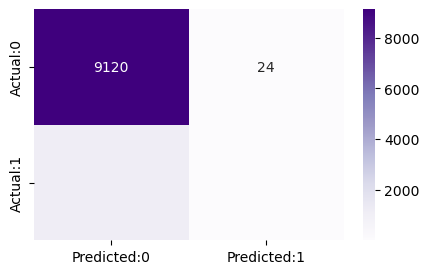

In [184]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cmap='Purples')
plt.show()

In [185]:
# classification report gives summary of the model. It is used as a performance metrics.
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     10265
           1       0.01      0.25      0.01        32

    accuracy                           0.89     10297
   macro avg       0.50      0.57      0.48     10297
weighted avg       0.99      0.89      0.94     10297



In [186]:
train_acc=svm_best.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 89.00003237188825
Testing Accuracy : 88.64717878993882
F1 Score : 1.350210970464135
Recall : 0.6938421509106678
Precision : 25.0


**K-Nearest Neighbor**

knn is used for both classification and regression.<br>
It is used to find nearest data point to the given input.<br>
classify it based on majority voting (in case of classification) and averaging their values (in case of regression).

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
knn = KNeighborsClassifier()

In [189]:
param_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9],
    'weights':['uniform', 'distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

In [190]:
grid_cv = GridSearchCV(knn,param_grid,scoring='accuracy',cv=5)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [191]:
best_params = grid_cv.best_params_

In [192]:
grid_cv.best_score_

0.9012657404168328

In [193]:
knn_best = KNeighborsClassifier(**best_params)

In [194]:
knn_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=9, weights='distance')

In [195]:
# used to make predictions on test data
y_pred = knn_best.predict(X_test)

In [196]:
train_acc=knn_best.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 100.0
Testing Accuracy : 90.44381858793822
F1 Score : 53.497164461247635
Recall : 49.08933217692975
Precision : 58.77466251298027


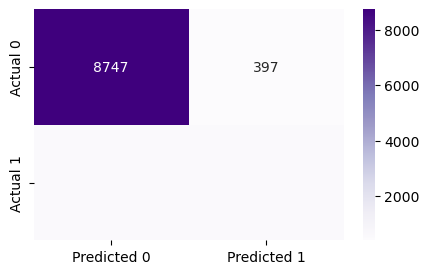

In [197]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,cmap='Purples',annot=True,fmt='d',xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'])
plt.show()

**Naive Bayes**

It is based on Baye's Theorem.
P(A∣B)= P(B∣A)×P(A) / P(B)

- GaussianNB <br>
It is a classifier which assumes data follows normal distribution.<br>
Used for continuous data

In [198]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [199]:
# used to make predictions on test data
y_pred=gnb.predict(X_test)

In [200]:
train_acc=gnb.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 83.66838237674403
Testing Accuracy : 84.04389628047004
F1 Score : 48.54368932038835
Recall : 67.21595836947094
Precision : 37.99019607843137


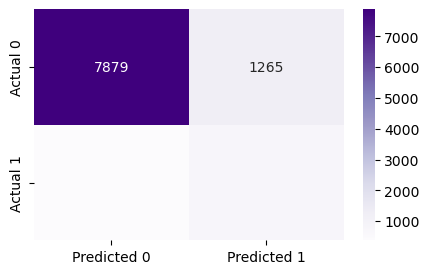

In [201]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Purples',xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'])
plt.show()

**Decision Tree**

It works by splitting data into branches based on feature values, forming a tree-like structure.

In [202]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(max_depth=3)

In [203]:
# hyperparameter tunning
param_grid = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [204]:
# classifier, parameters, cross-validation,scoring parameter is passed to GridSearchCV
# scoring is evaluation metric
grid_cv = GridSearchCV(d_tree,param_grid,cv=5,scoring='accuracy')

In [205]:
# fitting training data to the grid search cv
grid_cv.fit(X_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Del

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [206]:
best_params=grid_cv.best_params_

In [207]:
# best parameters are passed to classifier
d_treeBest=DecisionTreeClassifier(**best_params)

In [208]:
# fitting training data to the classifier
d_treeBest.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

In [209]:
#from sklearn import tree
#plt.figure(figsize=(20,15))
#tree.plot_tree(d_treeBest,filled=True)

In [210]:
# used to make predictions on test data
y_pred = d_treeBest.predict(X_test)

In [211]:
# calculating accuracy 
train_acc=gnb.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 83.66838237674403
Testing Accuracy : 90.33699135670584
F1 Score : 37.38200125865324
Recall : 25.758889852558543
Precision : 68.11926605504587


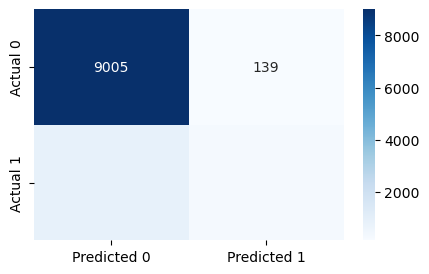

In [212]:
# plotting confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d',xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'])
plt.show()

> True Negatives (TN) = 9005 Model correctly predicted 0 when the actual class was 0.<br>
False Positives (FP) = 139 Model incorrectly predicted 1 when the actual class was 0.

**Random Forest Classifier**

It builds multiple decision tree and combines their output to improve accuracy.

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
# optuna suggests hyperparameters for tunning 
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']) # splitting criterion
    n_estimators = trial.suggest_int('n_estimators', 10,100,step=10) # no of trees
    max_depth = trial.suggest_int('max_depth', 5, 10, step=2) # maximum depth of tree
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10) # minimum samples required to split node
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4) # minimum samples required to split leaf
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2']) # no of features
# train the model using defined parameters
    rfc = RandomForestClassifier(
        criterion=criterion,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
# evaluates performance using cross-validation score
    score = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score
# Creates an Optuna study to maximize accuracy.
study = optuna.create_study(direction='maximize')
# Runs 20 trials, each testing different hyperparameter combinations.
study.optimize(objective, n_trials=20)

print("Best Parameters:", study.best_trial.params)

[I 2025-02-24 14:32:08,886] A new study created in memory with name: no-name-94ad97d9-bd92-45c4-8730-da60732e93b5
C:\Users\Dell\anaconda3\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [5, 10] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 9].
  warnings.warn(
[I 2025-02-24 14:32:15,196] Trial 0 finished with value: 0.9134376972390166 and parameters: {'criterion': 'gini', 'n_estimators': 100, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.9134376972390166.
C:\Users\Dell\anaconda3\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [5, 10] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 9].
  warnings.warn(
[I 2025-02-24 14:32:17,149] Trial 1 finished with value: 0.9127578760566589 and parameters: {'criterion': 'gini', 'n_estimators': 30, 'max_depth': 9, 'min_sample

Best Parameters: {'criterion': 'gini', 'n_estimators': 90, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}


In [215]:
best_params = study.best_trial.params

In [216]:
# best parameters are passed to classifier
rfc_best = RandomForestClassifier(**best_params)

In [217]:
# fitting training data to the RandomForestClassifier
rfc_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=3,
                       min_samples_split=8, n_estimators=90)

In [218]:
# used to make predictions on test data
y_pred = rfc_best.predict(X_test)

In [219]:
# accuracy is calculated and stored
train_accuracy = rfc_best.score(X_train,y_train)*100
test_acc = accuracy_score(y_test,y_pred)*100
recall = recall_score(y_test,y_pred)*100
f1 = f1_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred)*100
print('Training Accuracy: ', train_accuracy)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recall)
print("Precision :", precision)

Training Accuracy:  92.70337638794472
Testing Accuracy : 91.33728270370011
F1 Score : 50.49944506104328
Recall : 39.46227233304423
Precision : 70.10785824345146


**Comparision between all model's accuracy**

In [220]:
# training and testing score of each model is given 
training_accuracy_score={
    "Logistic Regression": 90.18808067074553,
    "SVM": 89.00003237188825,
    "Naive Bayes": 83.66838237674403,
    "Decision Tree": 83.66838237674403,
    "Random Forest": 92.53504256903305,
    "KNN": 100.0
}
testing_accuracy_score = {
    "Logistic Regression": 90.62833835097601,
    "SVM": 88.64717878993882,
    "Naive Bayes": 84.04389628047004,
    "Decision Tree": 90.70603088278139,
    "Random Forest": 91.17218607361367,
    "KNN": 90.44381858793822
}

In [221]:
# key and value pairs are assigned to variable
models = list(training_accuracy_score.keys())
scores = list(training_accuracy_score.values())

test_models = list(testing_accuracy_score.keys())
test_scores = list(testing_accuracy_score.values())

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


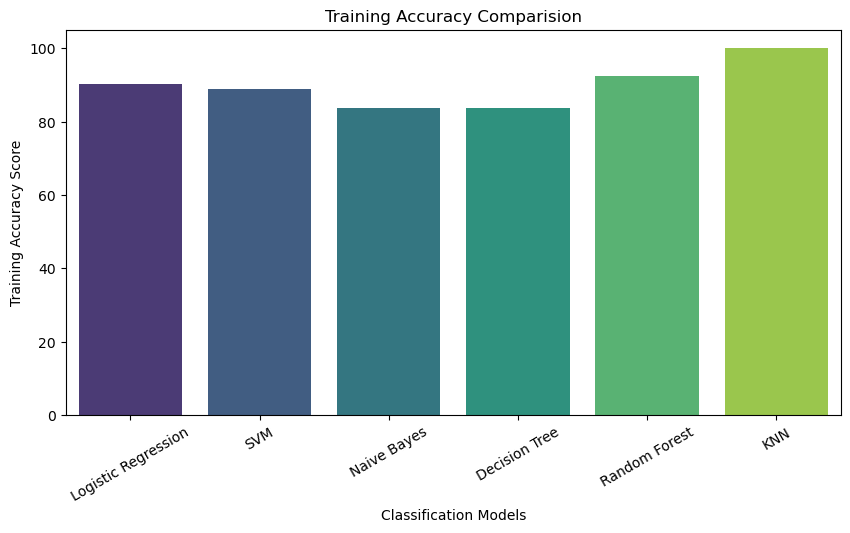

In [222]:
# plotting training accuracy of each model
plt.figure(figsize=(10,5))
sns.barplot(x=models,y=scores,palette='viridis')
plt.xlabel('Classification Models')
plt.ylabel('Training Accuracy Score')
plt.title('Training Accuracy Comparision')
plt.xticks(rotation=30)
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


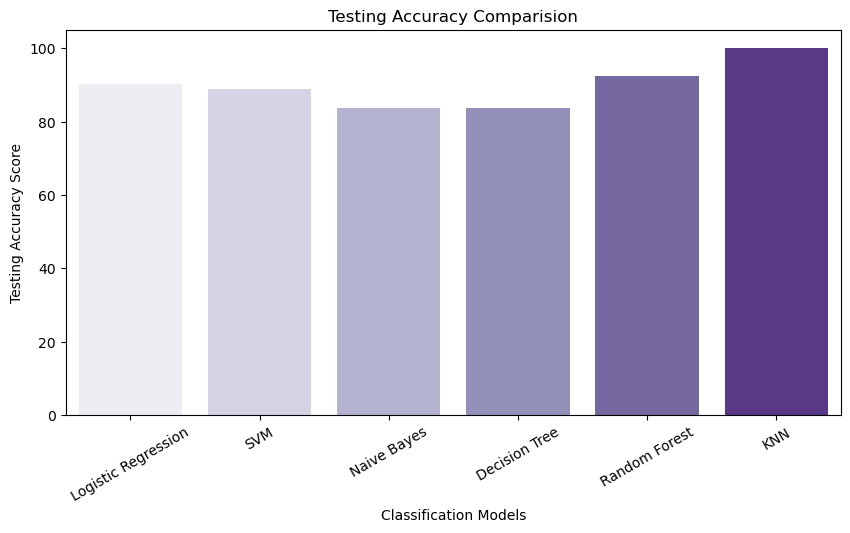

In [223]:
# plotting testing accuracy of each model
plt.figure(figsize=(10,5))
sns.barplot(x=models,y=scores,palette='Purples')
plt.xlabel('Classification Models')
plt.ylabel('Testing Accuracy Score')
plt.title('Testing Accuracy Comparision')
plt.xticks(rotation=30)
plt.show()

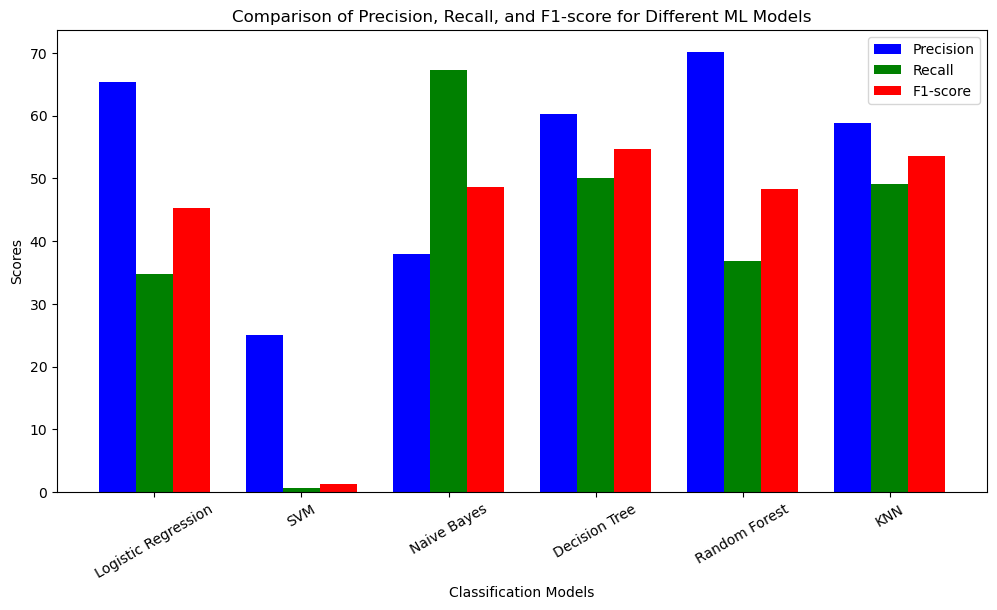

In [224]:
# numpy is python library used for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# store Precision, Recall, and F1-score for each model
metrics = {
    "Logistic Regression": {"Precision": 65.359477124183, "Recall": 34.69210754553339, "F1-score": 45.3257790368272},
    "SVM": {"Precision": 25.0, "Recall": 0.6938421509106678, "F1-score": 1.350210970464135},
    "Naive Bayes" : {"Precision": 37.99019607843137, "Recall": 67.21595836947094, "F1-score": 48.54368932038835},
    "Decision Tree": {"Precision": 60.22964509394571, "Recall": 50.043365134431916, "F1-score": 54.66603505447656},
    "Random Forest": {"Precision": 70.13201320132013, "Recall": 36.86036426712923, "F1-score": 48.322910744741336},
    "KNN": {"Precision": 58.77466251298027, "Recall": 49.08933217692975, "F1-score": 53.497164461247635}
}

# Converting the metrics in separate lists
models = list(metrics.keys())
precision_scores = [metrics[m]["Precision"] for m in models]
recall_scores = [metrics[m]["Recall"] for m in models]
f1_scores = [metrics[m]["F1-score"] for m in models]

# width of the bars
bar_width = 0.25

# plotting the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, precision_scores, width=bar_width, label='Precision', color='blue')
plt.bar(x, recall_scores, width=bar_width, label='Recall', color='green')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1-score', color='red')

# Formatting the plot
plt.xticks(ticks=x, labels=models, rotation=30)
plt.xlabel("Classification Models")
plt.ylabel("Scores")
plt.title("Comparison of Precision, Recall, and F1-score for Different ML Models")
plt.legend()
plt.show()


> __*Evaluating the Best Model Based on Results*__

>>*Decision Tree is best model because <br>
Training Accuracy : 83.66838237674403
Testing Accuracy : 90.33699135670584
F1 Score : 37.382001258653 balanced in recall and precision24
Recall : 25.758889852558 high recall 543
Precision : 68.1192660550 stable precision4 <br>
By considering this scores Decision Tree Classifier is best 587*